In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sbs
import datetime
from datetime import timedelta

In [2]:
port_start_date = "2017/6/1"
now = "2018/2/26"
index = pd.bdate_range(port_start_date, now)

In [3]:
# tickers' last date 2/23/2017
tickers_list = ["ADM", "APO", "CG", "CHKP", "FEYE", "FTI", "GEVO", 
                "GLD", "GPRO", "GRMN", "HPE", "IBM", "INTC", "JASO", 
                "JNPR", "QCOM", "SGOL", "SWM", "TM", "VEA", "VGIT", 
                "VGK", "VGLT", "VGSH", "VGT", "VOO", "VT", "VTI"]

In [4]:
def read_file(file_list):
    path = "C:/Users/pc/Desktop/portfolio_data/CSVs/"
    df = pd.DataFrame(index=index)
    for file in file_list:
        # using only "date" and "Adj Close" columns  
        data = pd.read_csv(path + file + ".csv", index_col=0, parse_dates=True, usecols=[0, 5]) 
        data = data.rename(columns={"Adj Close": file})
        # change anything which is not a float to NaN
        data = pd.to_numeric(data[file], errors="coerce")
        df = df.join(data, how="inner")
        df = df.dropna()
    return df

In [390]:
df_stock_prices = read_file(tickers_list)

In [391]:
df = pd.DataFrame(np.zeros((len(df_stock_prices.index), len(tickers_list))), 
                  index=df_stock_prices.index, columns=tickers_list)

In [392]:
df["ADM"].loc["7/10/2017":] = 2
df["APO"].loc["7/21/2017":] = 2
df["CG"].loc["7/21/2017":] = 2
df["CHKP"].loc["9/15/2017":] = 1
df["FEYE"].loc["1/16/2018":] = 1
df["FTI"].loc["6/21/2017":"8/23/2017"] = 4 
df["GEVO"].loc["6/22/2017":"8/24/2017"] = 50
df["GLD"].loc["11/3/2017":] = 1
df["GPRO"].loc["1/16/2018":] = 10
df["GRMN"].loc["6/16/2017":] = 3
df["HPE"].loc["1/4/2018":] = 1
df["IBM"].loc["9/20/2017":] = 1
df["INTC"].loc["7/10/2017":"1/7/2018"] = 2
df["JASO"].loc["6/23/2017":"9/14/2017"] = 5
df["JASO"].loc["9/15/2017":] = 10
df["JNPR"].loc["9/15/2017":] = 2
df["QCOM"].loc["7/10/2017":] = 2
df["SGOL"].loc["11/3/2017":] = 1
df["SWM"].loc["7/10/2017":] = 2
df["TM"].loc["6/5/2017":] = 2
df["VEA"].loc["10/24/2017":] = 2 
df["VGIT"].loc["8/10/2017":"10/23/2017"] = 5
df["VGK"].loc["10/24/2017"] = 2
df["VGLT"].loc["8/10/2017":"9/27/2017"] = 5
df["VGLT"].loc["9/28/2017":"10/23/2017"] = 6
df["VGLT"].loc["10/24/2017"] = 1
df["VGLT"].loc["10/25/2017"] = 8
df["VGLT"].loc["10/26/2017":] = 6
df["VGSH"].loc["8/10/2017":"9/20/2017"] = 3
df["VGSH"].loc["9/28/2017":"10/23/2017"] = 1
df["VGT"].loc["10/24/2017"] = 1
df["VOO"].loc["10/24/2017":] = 1
df["VT"].loc["10/24/2017"] = 1
df["VTI"].loc["9/20/2017":"10/23/2017"] = 1
df["VTI"].loc["10/24/2017"] = 2

In [393]:
positions = df * df_stock_prices
positions = positions.round(2)
positions.head()

,ADM,APO,CG,CHKP,FEYE,FTI,GEVO,GLD,GPRO,GRMN,...,TM,VEA,VGIT,VGK,VGLT,VGSH,VGT,VOO,VT,VTI
2017-06-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-06-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-06-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,215.52,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-06-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,215.60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-06-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,215.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [394]:
df = pd.DataFrame(np.zeros((len(df_stock_prices.index), len(tickers_list))), 
                  index=df_stock_prices.index, columns=tickers_list)
df["ADM"].loc["7/10/2017"] = -2
df["APO"].loc["7/21/2017"] = -2
df["CG"].loc["7/21/2017"] = -2
df["CHKP"].loc["9/15/2017"] = -1
df["FEYE"].loc["1/16/2018"] = -1
df["FTI"].loc["6/21/2017"] = -4
df["FTI"].loc["8/24/2017"] = 4 
df["GEVO"].loc["6/22/2017"] = -50
df["GEVO"].loc["8/25/2017"] = 50
df["GLD"].loc["11/3/2017"] = -1
df["GPRO"].loc["1/16/2018"] = -10
df["GRMN"].loc["6/16/2017"] = -3
df["HPE"].loc["1/4/2018"] = -1
df["IBM"].loc["9/20/2017"] = -1
df["INTC"].loc["7/10/2017"] = -2
df["INTC"].loc["1/8/2018"] = 2
df["JASO"].loc["6/23/2017"] = -5
df["JASO"].loc["9/15/2017"] = -5
df["JNPR"].loc["9/15/2017"] = -2
df["QCOM"].loc["7/10/2017"] = -2
df["SGOL"].loc["11/3/2017"] = -1
df["SWM"].loc["7/10/2017"] = -2
df["TM"].loc["6/5/2017"] = -2
df["VEA"].loc["10/24/2017"] = -2 
df["VGIT"].loc["8/10/2017"] = -5
df["VGIT"].loc["10/24/2017"] = 5
df["VGK"].loc["10/24/2017"] = -2
df["VGK"].loc["10/25/2017"] = 2
df["VGLT"].loc["8/10/2017"] = -5
df["VGLT"].loc["9/28/2017"] = -1
df["VGLT"].loc["10/24/2017"] = 5
df["VGLT"].loc["10/25/2017"] = -7
df["VGLT"].loc["10/26/2017"] = 2
df["VGSH"].loc["8/10/2017"] = -3
df["VGSH"].loc["9/21/2017"] = 3
df["VGSH"].loc["9/28/2017"] = -1
df["VGSH"].loc["10/24/2017"] = 1
df["VGT"].loc["10/24/2017"] = -1
df["VGT"].loc["10/25/2017"] = 1
df["VOO"].loc["10/24/2017"] = -1
df["VT"].loc["10/24/2017"] = -1
df["VT"].loc["10/25/2017"] = 1
df["VTI"].loc["9/20/2017"] = -1
df["VTI"].loc["10/24/2017"] = -1
df["VTI"].loc["10/25/2017"] = 2


In [395]:
take_exit = df * df_stock_prices
take_exit["Cash"] = take_exit.sum(axis=1)
take_exit.loc[take_exit.index[0], "Cash"] = 2200
dividends = pd.read_csv("dividends.csv", index_col=0, usecols=["Date", "Total"], parse_dates=True)
take_exit["Cash"] += dividends["Total"]
take_exit.loc['2017-10-25']

ADM       0.000000
APO       0.000000
CG        0.000000
CHKP      0.000000
FEYE      0.000000
FTI       0.000000
GEVO      0.000000
GLD       0.000000
GPRO      0.000000
GRMN      0.000000
HPE       0.000000
IBM       0.000000
INTC      0.000000
JASO      0.000000
JNPR      0.000000
QCOM      0.000000
SGOL      0.000000
SWM       0.000000
TM        0.000000
VEA       0.000000
VGIT      0.000000
VGK     115.721146
VGLT   -525.929369
VGSH      0.000000
VGT     156.883804
VOO       0.000000
VT       71.197067
VTI     261.517700
Cash     79.390348
Name: 2017-10-25 00:00:00, dtype: float64

In [396]:
take_exit["Cash"] = np.cumsum(np.array(take_exit["Cash"]))
take_exit["Cash"]

2017-06-01    2200.000000
2017-06-02    2200.000000
2017-06-05    1984.479996
2017-06-06    1984.479996
2017-06-07    1984.479996
2017-06-08    1984.479996
2017-06-09    1984.479996
2017-06-12    1984.479996
2017-06-13    1984.479996
2017-06-14    1984.479996
2017-06-15    1984.479996
2017-06-16    1835.966367
2017-06-19    1835.966367
2017-06-20    1835.966367
2017-06-21    1730.523823
2017-06-22    1701.023823
2017-06-23    1668.823823
2017-06-26    1668.823823
2017-06-27    1668.823823
2017-06-28    1668.823823
2017-06-29    1668.823823
2017-06-30    1671.043823
2017-07-03    1671.043823
2017-07-05    1671.043823
2017-07-06    1671.043823
2017-07-07    1671.043823
2017-07-10    1344.377563
2017-07-11    1344.377563
2017-07-12    1344.377563
2017-07-13    1344.377563
                 ...     
2018-01-11     107.297836
2018-01-12     107.297836
2018-01-16      28.667836
2018-01-17      28.667836
2018-01-18      28.667836
2018-01-19      28.667836
2018-01-22      28.667836
2018-01-23  

In [397]:
positions["Cash"] = take_exit["Cash"]
positions = positions.rename(columns={"Cash":"Cash+Dividends"})
positions["Portfolio"] = positions.sum(1)

In [398]:
positions.head()

,ADM,APO,CG,CHKP,FEYE,FTI,GEVO,GLD,GPRO,GRMN,...,VGIT,VGK,VGLT,VGSH,VGT,VOO,VT,VTI,Cash+Dividends,Portfolio
2017-06-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2200.000000,2200.000000
2017-06-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2200.000000,2200.000000
2017-06-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1984.479996,2199.999996
2017-06-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1984.479996,2200.079996
2017-06-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1984.479996,2199.539996


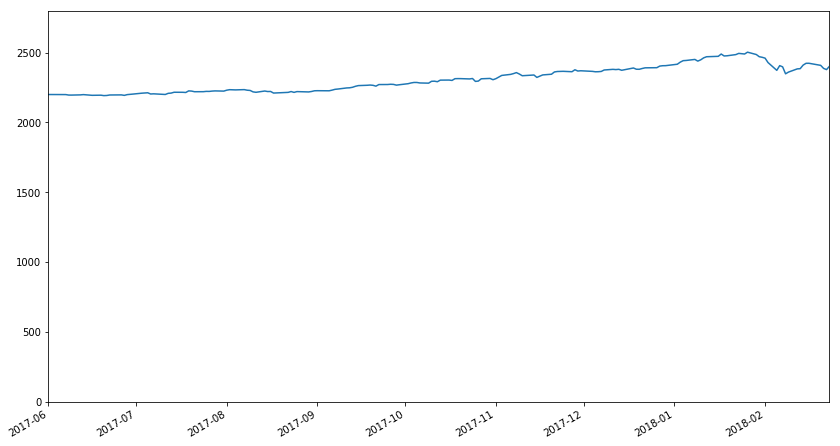

In [399]:
positions["Portfolio"].plot(ylim=(0, 2800))

# Portfolio performance vs S&P

In [400]:
SandP = pd.DataFrame(index=index)
SandP_long = pd.read_csv("C:/Users/pc/Desktop/portfolio_data/CSVs/GSPC.csv",index_col=0, parse_dates=True, usecols=[0, 5])
SandP_long.rename(columns={"Adj Close": "S&P"}, inplace=True)
SandP = SandP.join(SandP_long, how='inner')

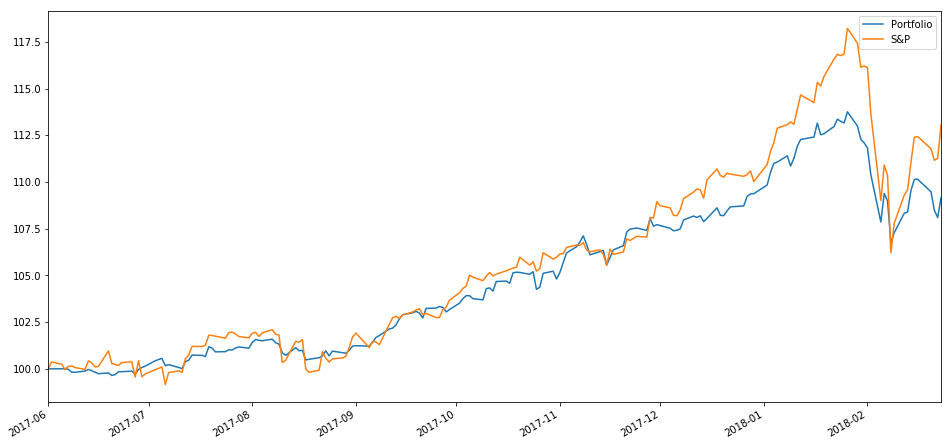

In [401]:
norm_port = positions["Portfolio"]/positions["Portfolio"].loc[positions.index[0]] * 100
norm_snp = SandP/SandP.loc[SandP.index[0]] * 100
ax = (norm_port).plot(figsize=(16,8), legend=True)
(norm_snp).plot(ax=ax)

In [402]:
norm_port = pd.DataFrame(norm_port) 
norm_port_snp = norm_port.merge(norm_snp, left_index=True, right_index=True)
norm_port_snp.to_csv("norm_port_snp.csv")

In [403]:
portfolio = pd.DataFrame(positions["Portfolio"])

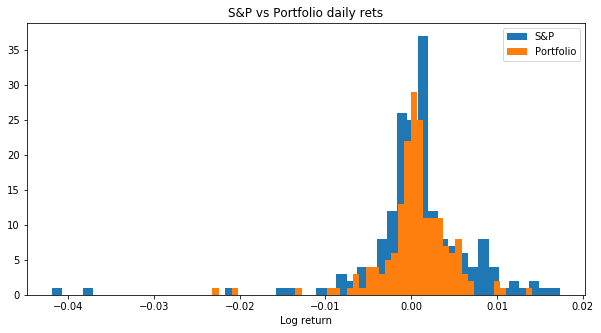

In [404]:
log_ret_port = np.log(portfolio / portfolio.shift(1)) # daily
log_ret_snp = np.log(SandP / SandP.shift(1)) # daily
ax = log_ret_snp.hist(bins=50, figsize=(10, 5), grid=False)
log_ret_port.hist(bins=50, figsize=(10, 5), grid=False, ax=ax)
plt.xlabel("Log return")
plt.title("S&P vs Portfolio daily rets")
plt.legend(["S&P", "Portfolio"])

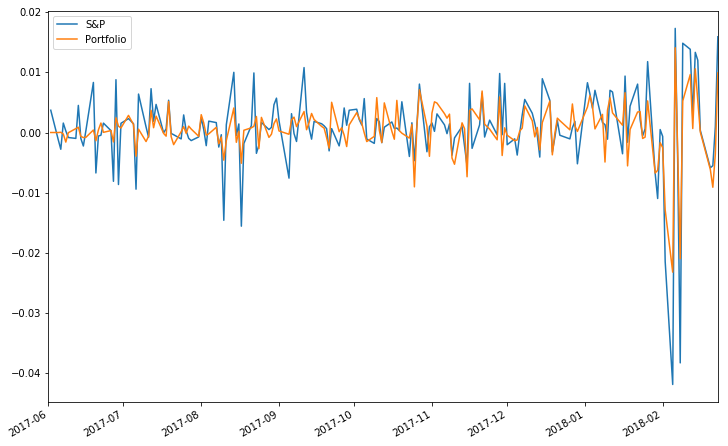

In [405]:
ax1 = log_ret_snp.plot()
log_ret_port.plot(ax=ax1, figsize=(12, 8))

In [406]:
log_rets = log_ret_snp.join(log_ret_port, how='inner')
log_rets.corr()

,S&P,Portfolio
S&P,1.000000,0.834445
Portfolio,0.834445,1.000000


In [407]:
log_rets.to_csv("log_rets.csv")

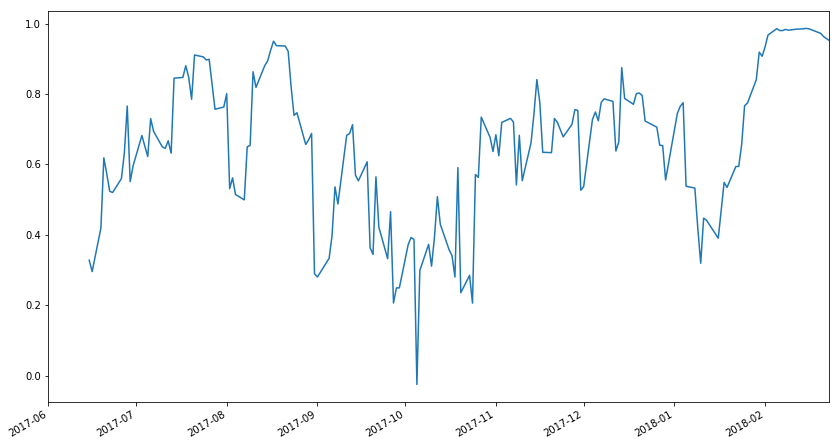

In [408]:
log_rets["S&P"].rolling(window=10).corr(log_rets["Portfolio"]).plot()

# Linear Regression 

In [409]:
import sklearn
np.set_printoptions(suppress=True)
from sklearn.linear_model import LinearRegression

In [410]:
lin_reg = LinearRegression()

In [411]:
lin_reg.fit(log_ret_snp.dropna().values.reshape(-1,1), log_ret_port.dropna().values.reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [412]:
# beta
beta_port = lin_reg.coef_.flatten()
beta_port

array([ 0.52029052])

In [413]:
intercept = lin_reg.intercept_
intercept

array([ 0.00013002])

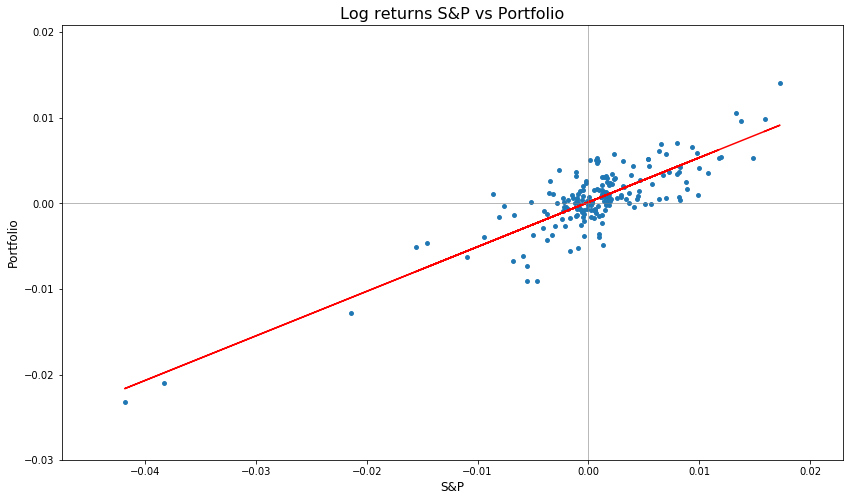

In [449]:
plt.rc('figure', figsize=(14, 8))
plt.scatter(log_ret_snp, log_ret_port, s = 15)
plt.plot(log_ret_snp, beta_port * log_ret_snp + intercept, "-", color='r')
plt.axhline(color='grey', linewidth=.55)
plt.axvline(color='grey', linewidth=.55)
plt.xlabel("S&P", size=12)
plt.ylabel("Portfolio", size=12)
plt.title("Log returns S&P vs Portfolio", size=16)

# Stats

### Annualized

In [415]:
port_std = np.float16(log_ret_port.std() * np.sqrt(252))
port_std

array([ 0.06634521], dtype=float16)

In [416]:
exp_ret_port = np.float16(log_ret_port.mean() * 252)
exp_ret_port

array([ 0.12017822], dtype=float16)

In [417]:
snp_std = np.float16(log_ret_snp.std() * np.sqrt(252))
snp_std

array([ 0.10638428], dtype=float16)

In [418]:
exp_ret_snp = np.float16(log_ret_snp.mean() * 252)
exp_ret_snp

array([ 0.16809082], dtype=float16)

# Ratios

In [419]:
# risk_free rate "r" on 03/02/18 on 10 year treasury 
r = .0286

In [420]:
sharpe_port = (exp_ret_port - r) / port_std
sharpe_port

array([ 1.37988281], dtype=float16)

In [421]:
sharpe_snp = (exp_ret_snp - r) / snp_std
sharpe_snp

array([ 1.31152344], dtype=float16)

In [422]:
treynor_port = (exp_ret_port - r) / beta_port
treynor_port

array([ 0.17596464])

In [482]:
realized_ret_port = ((norm_port_snp.loc[norm_port_snp.index[-1]] - norm_port_snp.loc[norm_port_snp.index[0]]) / \
norm_port_snp.loc[norm_port_snp.index[0]])[0]
realized_ret_snp = ((norm_port_snp.loc[norm_port_snp.index[-1]] - norm_port_snp.loc[norm_port_snp.index[0]]) / \
norm_port_snp.loc[norm_port_snp.index[0]])[1]

In [483]:
alpha = realized_ret_port - r - beta_port*(realized_ret_snp - r)
alpha

array([ 0.01008815])

# Portfolio allocation; weight, sector, industry

In [424]:
port_allocation = positions.loc[positions.index[-1], positions.columns[0:-1]]
port_allocation.replace(0, np.nan, inplace=True)
port_allocation.dropna(inplace=True)

In [425]:
port_allocation

ADM                85.140000
APO                68.500000
CG                 46.300000
CHKP              104.310000
FEYE               16.460000
GLD               126.140000
GPRO               55.900000
GRMN              181.050000
HPE                18.140000
IBM               155.520000
JASO               73.900000
JNPR               52.240000
QCOM              126.640000
SGOL              128.640000
SWM                79.800000
TM                274.060000
VEA                90.800000
VGLT              436.140000
VOO               252.490000
Cash+Dividends     29.637836
Name: 2018-02-23 00:00:00, dtype: float64

In [426]:
weights = port_allocation / port_allocation.sum() * 100
weights

ADM                3.544830
APO                2.852018
CG                 1.927715
CHKP               4.342979
FEYE               0.685317
GLD                5.251877
GPRO               2.327414
GRMN               7.538072
HPE                0.755264
IBM                6.475123
JASO               3.076849
JNPR               2.175028
QCOM               5.272695
SGOL               5.355966
SWM                3.322497
TM                11.410571
VEA                3.780486
VGLT              18.158822
VOO               10.512498
Cash+Dividends     1.233980
Name: 2018-02-23 00:00:00, dtype: float64

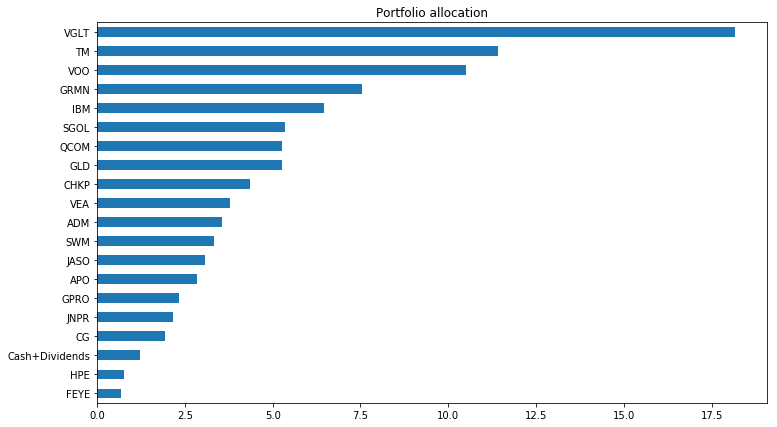

In [427]:
weights.sort_values().plot(kind='barh', figsize=(12, 7))
plt.title("Portfolio allocation")

In [255]:
weights.to_csv("weights.csv")

In [428]:
sector = {"VGLT": "Long US Bonds", "TM": "Consumer Goods", "VOO":"Blend ETF", 
          "GRMN": "Technology", "IBM":"Technology", "SGOL":"Commodity ETF", "QCOM":"Technology",
         "GLD":"Commodity ETF", "CHKP":"Technology", "VEA":"Blend ETF", "ADM":"Consumer Goods",
         "SWM":"Consumer Goods", "JASO":"Technology", "APO":"Financial", "GRPO":"Consumer Goods", 
         "JNPR":"Technology", "CG":"Financial", "Cash+Dividends": "Cash", "HPE":"Technology", 
         "FEYE":"Technology"}

industry = {"VGLT": "Vanguard Long-Term Treasury", "TM": "Auto Manufacturers", 
            "VOO":"Vanguard S&P 500", "GRMN": "Scientific & Technical Instruments", 
            "IBM":"Information Technology Services", 
            "SGOL":"ETF Precious Metals", "QCOM":"Communication Equipment","GLD":"SPDR Precious Metals ETF", 
            "CHKP":"Security Software & Services", "VEA":"Vanguard FTSE", "ADM":"Farm Products",
         "SWM":"Paper & Paper Products", "JASO":"Semiconductor", "APO":"Diversified Investments", 
            "GRPO":"Photographic Equipment & Supplies", "JNPR":"Networking & Communication Devices", 
            "CG":"Asset Management", "Cash+Dividends": "Cash", "HPE":"Information Technology", 
         "FEYE":"Application Software"}

In [429]:
distribution = pd.DataFrame(np.array(weights.sort_values(ascending=False)), index=sector.keys())
distribution = distribution.rename(columns={0:"Weight"})
distribution

,Weight
VGLT,18.158822
TM,11.410571
VOO,10.512498
GRMN,7.538072
IBM,6.475123
SGOL,5.355966
QCOM,5.272695
GLD,5.251877
CHKP,4.342979
VEA,3.780486


In [430]:
sector_ser = pd.Series(sector)
distribution = distribution.merge(sector_ser.to_frame(), left_index=True, right_index=True)
distribution

,Weight,0
VGLT,18.158822,Long US Bonds
TM,11.410571,Consumer Goods
VOO,10.512498,Blend ETF
GRMN,7.538072,Technology
IBM,6.475123,Technology
SGOL,5.355966,Commodity ETF
QCOM,5.272695,Technology
GLD,5.251877,Commodity ETF
CHKP,4.342979,Technology
VEA,3.780486,Blend ETF


In [431]:
industry_ser = pd.Series(industry)
distribution = distribution.merge(industry_ser.to_frame(), left_index=True, right_index=True)

In [432]:
distribution

,Weight,0_x,0_y
VGLT,18.158822,Long US Bonds,Vanguard Long-Term Treasury
TM,11.410571,Consumer Goods,Auto Manufacturers
VOO,10.512498,Blend ETF,Vanguard S&P 500
GRMN,7.538072,Technology,Scientific & Technical Instruments
IBM,6.475123,Technology,Information Technology Services
SGOL,5.355966,Commodity ETF,ETF Precious Metals
QCOM,5.272695,Technology,Communication Equipment
GLD,5.251877,Commodity ETF,SPDR Precious Metals ETF
CHKP,4.342979,Technology,Security Software & Services
VEA,3.780486,Blend ETF,Vanguard FTSE


In [433]:
distribution = distribution.rename(columns={"0_x":"Sector", "0_y":"Industry"})

In [434]:
distribution.reset_index(inplace=True)
distribution = distribution.rename(columns={"index":"Ticker"})
distribution

,Ticker,Weight,Sector,Industry
0,VGLT,18.158822,Long US Bonds,Vanguard Long-Term Treasury
1,TM,11.410571,Consumer Goods,Auto Manufacturers
2,VOO,10.512498,Blend ETF,Vanguard S&P 500
3,GRMN,7.538072,Technology,Scientific & Technical Instruments
4,IBM,6.475123,Technology,Information Technology Services
5,SGOL,5.355966,Commodity ETF,ETF Precious Metals
6,QCOM,5.272695,Technology,Communication Equipment
7,GLD,5.251877,Commodity ETF,SPDR Precious Metals ETF
8,CHKP,4.342979,Technology,Security Software & Services
9,VEA,3.780486,Blend ETF,Vanguard FTSE


In [435]:
group_by_sec = distribution.groupby("Sector").sum()
group_by_sec

,Weight
Sector,
Blend ETF,14.292984
Cash,1.233980
Commodity ETF,10.607843
Consumer Goods,20.605312
Financial,4.779733
Long US Bonds,18.158822
Technology,30.321327


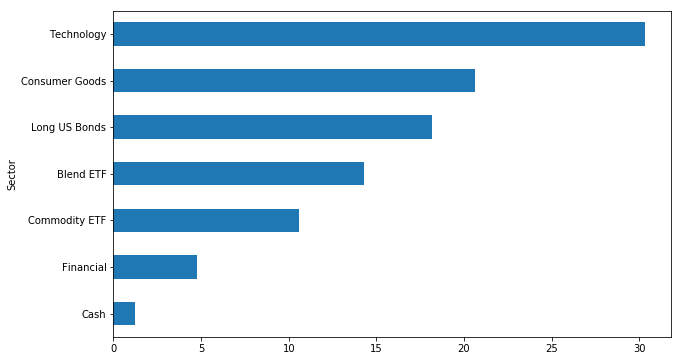

In [436]:
group_by_sec.sort_values(by="Weight").plot(kind='barh', figsize=(10, 6), legend=False)

In [438]:
distribution.to_csv("distribution.csv")

In [439]:
distribution

,Ticker,Weight,Sector,Industry
0,VGLT,18.158822,Long US Bonds,Vanguard Long-Term Treasury
1,TM,11.410571,Consumer Goods,Auto Manufacturers
2,VOO,10.512498,Blend ETF,Vanguard S&P 500
3,GRMN,7.538072,Technology,Scientific & Technical Instruments
4,IBM,6.475123,Technology,Information Technology Services
5,SGOL,5.355966,Commodity ETF,ETF Precious Metals
6,QCOM,5.272695,Technology,Communication Equipment
7,GLD,5.251877,Commodity ETF,SPDR Precious Metals ETF
8,CHKP,4.342979,Technology,Security Software & Services
9,VEA,3.780486,Blend ETF,Vanguard FTSE
